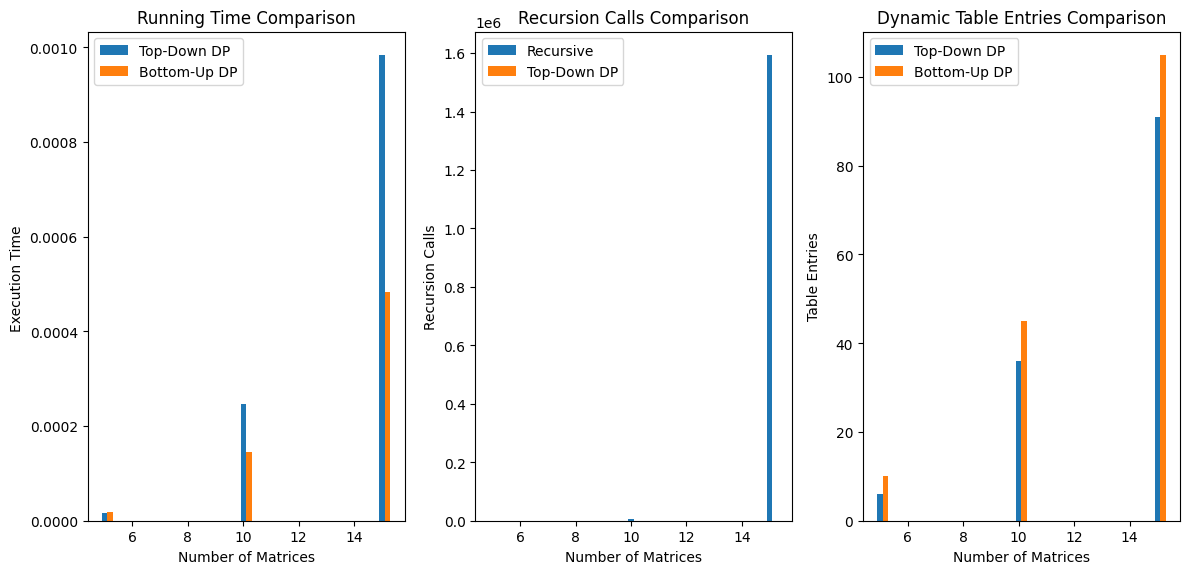

In [1]:
import sys
import random
import time
import matplotlib.pyplot as plt

def matrix_chain_order_recursive(p, i, j, count_calls):
    count_calls[0] += 1
    if i == j:
        return 0

    min_multiplications = sys.maxsize

    for k in range(i, j):
        cost = (matrix_chain_order_recursive(p, i, k, count_calls) +
                matrix_chain_order_recursive(p, k + 1, j, count_calls) +
                p[i - 1] * p[k] * p[j])

        min_multiplications = min(min_multiplications, cost)

    return min_multiplications

def matrix_chain_order_top_down(p, i, j, memo, recursion_calls, table_entries):
    if i == j:
        return 0

    if (i, j) in memo:
        return memo[(i, j)]

    min_multiplications = sys.maxsize

    for k in range(i, j):
        recursion_calls[0] += 1
        cost = (matrix_chain_order_top_down(p, i, k, memo, recursion_calls, table_entries) +
                matrix_chain_order_top_down(p, k + 1, j, memo, recursion_calls, table_entries) +
                p[i - 1] * p[k] * p[j])

        min_multiplications = min(min_multiplications, cost)

    memo[(i, j)] = min_multiplications
    table_entries[0] += 1
    return min_multiplications

def matrix_chain_order_bottom_up(p):
    n = len(p) - 1  # number of matrices

    m = [[0 for _ in range(n)] for _ in range(n)]
    s = [[0 for _ in range(n)] for _ in range(n)]

    for length in range(2, n + 1):
        for i in range(n - length + 1):
            j = i + length - 1
            m[i][j] = sys.maxsize

            for k in range(i, j):
                cost = m[i][k] + m[k + 1][j] + p[i] * p[k + 1] * p[j + 1]

                if cost < m[i][j]:
                    m[i][j] = cost
                    s[i][j] = k

    return m, s

def generate_and_test_matrix_chain_recursive(n):
    matrix_dimensions = [random.randint(1, 100) for _ in range(n)]
    count_calls = [0]
    start_time = time.time()
    matrix_chain_order_recursive(matrix_dimensions, 1, len(matrix_dimensions) - 1, count_calls)
    end_time = time.time()
    execution_time = end_time - start_time

    return execution_time, count_calls[0]

def generate_and_test_matrix_chain_top_down(n):
    matrix_dimensions = [random.randint(1, 100) for _ in range(n)]
    memo = {}
    recursion_calls = [0]
    table_entries = [0]
    start_time = time.time()
    matrix_chain_order_top_down(matrix_dimensions, 1, len(matrix_dimensions) - 1, memo, recursion_calls, table_entries)
    end_time = time.time()
    execution_time = end_time - start_time

    return execution_time, recursion_calls[0], table_entries[0]

def generate_and_test_matrix_chain_bottom_up(n):
    matrix_dimensions = [random.randint(1, 100) for _ in range(n)]
    start_time = time.time()
    matrix_chain_order_bottom_up(matrix_dimensions)
    end_time = time.time()
    execution_time = end_time - start_time

    return execution_time, n * (n - 1) // 2

test_sizes = [5, 10, 15]  # List of test sizes (number of matrices)
execution_times_recursive = []
execution_times_top_down = []
execution_times_bottom_up = []
recursion_calls_recursive = []
recursion_calls_top_down = []

table_entries_top_down = []
table_entries_bottom_up = []

for n in test_sizes:

    execution_time_recursive, recursion_calls_recursive_value = generate_and_test_matrix_chain_recursive(n)
    execution_time_top_down, recursion_calls_top_down_value, table_entries_top_down_value = generate_and_test_matrix_chain_top_down(n)
    execution_time_bottom_up, table_entries_bottom_up_value = generate_and_test_matrix_chain_bottom_up(n)

    execution_times_recursive.append(execution_time_recursive)
    execution_times_top_down.append(execution_time_top_down)
    execution_times_bottom_up.append(execution_time_bottom_up)
    recursion_calls_recursive.append(recursion_calls_recursive_value)
    recursion_calls_top_down.append(recursion_calls_top_down_value)

    table_entries_top_down.append(table_entries_top_down_value)
    table_entries_bottom_up.append(table_entries_bottom_up_value)


plt.figure(figsize=(12, 6))
plt.subplot(1, 3, 1)

plt.bar(test_sizes, execution_times_top_down, width=0.2, label='Top-Down DP')

plt.bar([x + 0.2 for x in test_sizes], execution_times_bottom_up, width=0.2, label='Bottom-Up DP')
plt.title("Running Time Comparison")
plt.xlabel("Number of Matrices")
plt.ylabel("Execution Time ")
plt.legend()

plt.subplot(1, 3, 2)
plt.bar(test_sizes, recursion_calls_recursive, width=0.2, label='Recursive')
plt.bar([x + 0.2 for x in test_sizes], recursion_calls_top_down, width=0.2, label='Top-Down DP')
plt.title("Recursion Calls Comparison")
plt.xlabel("Number of Matrices")
plt.ylabel("Recursion Calls")
plt.legend()

plt.subplot(1, 3, 3)
plt.bar(test_sizes, table_entries_top_down, width=0.2, label='Top-Down DP')
plt.bar([x + 0.2 for x in test_sizes], table_entries_bottom_up, width=0.2, label='Bottom-Up DP')
plt.title("Dynamic Table Entries Comparison")
plt.xlabel("Number of Matrices")
plt.ylabel("Table Entries")
plt.legend()

plt.tight_layout()
plt.show()
